# Image Denoising

In this notebook we will experiment with different image denoising techniques

In [1]:
DATA_PATH = r'C:\Users\itber\Documents\learning\udemy\nn_bootcamp\data\hymenoptera_data'

### Get Data
We will use pytorch to create dataloaders

In [2]:
import os
import cv2
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from noise_transforms import AddGaussianNoise, MotionBlur


image_transforms = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor()])

# get test and trainin data
train_data = datasets.ImageFolder(os.path.join(DATA_PATH, 'train'), transform=image_transforms)
test_data = datasets.ImageFolder(os.path.join(DATA_PATH, 'test'), transform=image_transforms)

# how many samples per batch to load
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [3]:
# helper function

def apply_noise(images, noise):
    noisy = noise(images)

    # return images normalizes to 0-1
    return (noisy - noisy.min(0, keepdim=True)[0]) \
            / (noisy.max(0, keepdim=True)[0] - noisy.min(0, keepdim=True)[0])


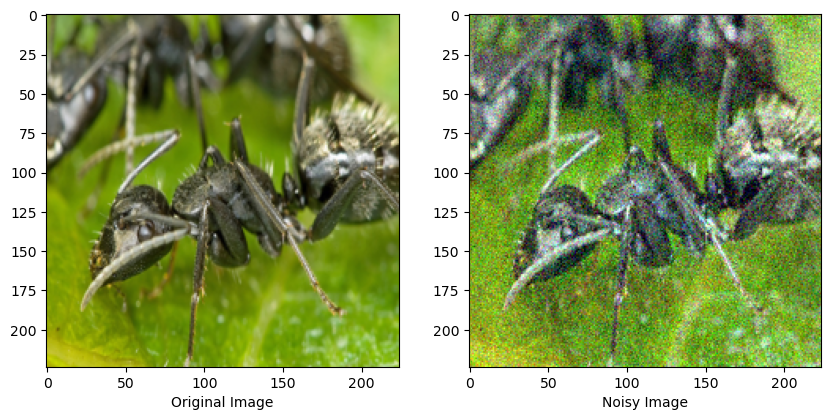

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
images, _ = next(iter(train_loader))

# get noisy image
noisy_images = images.clone()
# AddGaussianNoise(0.1)(noisy_images)
noisy_images = apply_noise(noisy_images, AddGaussianNoise(0.1))

# get one image from the batch and tranpose to get correct dimensions
idx = 0
img = np.squeeze(images.numpy()[idx]).transpose((1, 2, 0))
n_img = np.squeeze(noisy_images.numpy()[idx]).transpose((1, 2, 0))

# plot images
_, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(img)
ax[0].set_xlabel('Original Image')
ax[1].imshow(n_img)
ax[1].set_xlabel('Noisy Image');

### Initial Approach
Let's see how well some basic methods work to denoise the images

In [9]:
import cv2

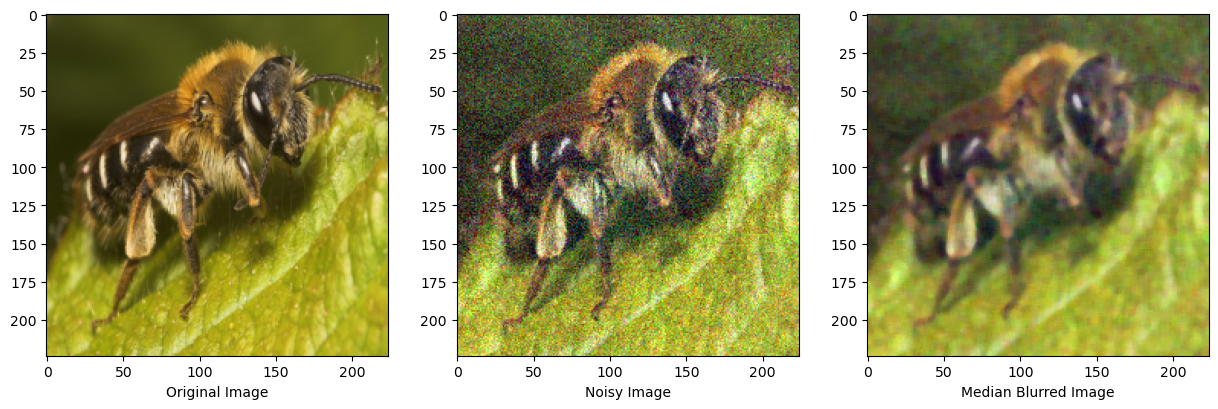

In [386]:
median = cv2.medianBlur(n_img,5)

_, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_xlabel('Original Image')
ax[1].imshow(n_img)
ax[1].set_xlabel('Noisy Image');
ax[2].imshow(median)
ax[2].set_xlabel('Median Blurred Image');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


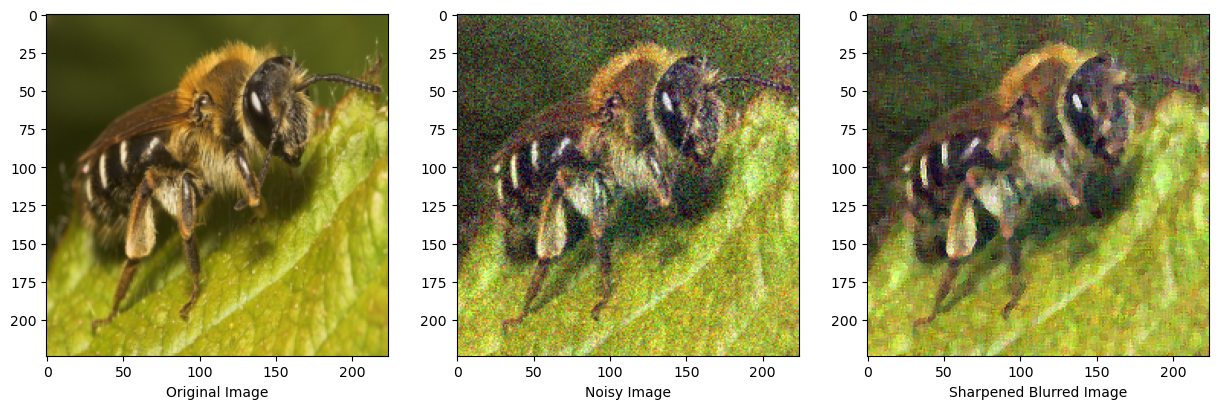

In [411]:
# kernel = np.ones((5,5),np.float32)/25
# dst = cv2.filter2D(n_img, -1, kernel)

# try sharpening the median blurred image
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]], np.float32)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
sharpened = cv2.filter2D(median, -1, kernel)

_, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_xlabel('Original Image')
ax[1].imshow(n_img)
ax[1].set_xlabel('Noisy Image');
ax[2].imshow(sharpened)
ax[2].set_xlabel('Sharpened Blurred Image');

In [412]:
kernel.sum()

1.0

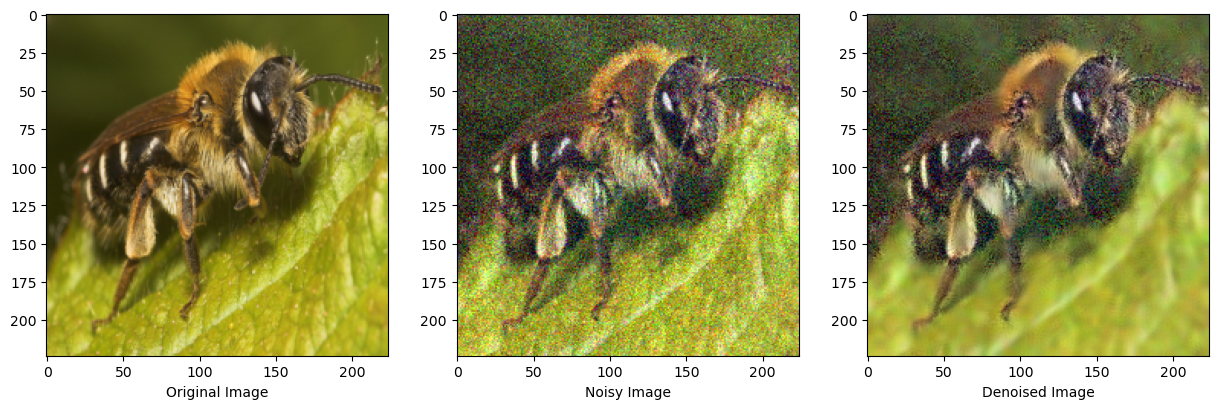

In [466]:
dst = cv2.fastNlMeansDenoisingColored((n_img*255).astype(np.uint8), None, 15, 15, 11, 7)

_, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_xlabel('Original Image')
ax[1].imshow(n_img)
ax[1].set_xlabel('Noisy Image');
ax[2].imshow(dst)
ax[2].set_xlabel('Denoised Image');